In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/msc_experiments
%pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive/msc_experiments


'/content/gdrive/MyDrive/msc_experiments'

In [3]:
# include source code from drive

import sys

_module_path = '/content/gdrive/MyDrive/msc_experiments'
if _module_path not in sys.path:
    sys.path.append(_module_path)

In [4]:
!pip install transformers tokenizers datasets evaluate tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 56.7 MB/s 
     |████████████████████████████████| 441 kB 71.9 MB/s 
     |████████████████████████████████| 72 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 60.0 MB/s 
     |████████████████████████████████| 163 kB 73.7 MB/s 
     |████████████████████████████████| 95 kB 6.1 MB/s 
     |████████████████████████████████| 212 kB 76.1 MB/s 
     |████████████████████████████████| 115 kB 69.2 MB/s 
     |████████████████████████████████| 127 kB 52.4 MB/s 
     |████████████████████████████████| 115 kB 65.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      S

In [16]:
# MODEL SELECTION COFIG

# dataset
DATASET_ID = 'assin2'
DATASET_TEXT_PAIR = True
DATASET_TRAIN_SPLIT = 'train'
DATASET_VALIDATION_SPLIT = 'validation'
DATASET_BATCH_SIZE = 32

# models
MODEL_IDS = [
    # 'bert-base-cased',
    'xlm-roberta-base',
]

# training parameters
EPOCHS = 3
EXECS_PER_TRIAL = 2
LR_VALUES = [1e-3, 1e-4]    # , 1e-5, 1e-6, 1e-7]

# results
OUTPUT_DIR = 'results/model_selection'

# Model Selection

In [17]:
from transformers import AutoTokenizer

from src.dataset import load_experiment_dataset
from src.dataset.tokenization import to_tf_dataset
from src.dataset.tokenization import tokenize_dataset
from src.metrics import SparseF1Score
from src.model_selection import build_classification_model
from src.model_selection import hyperparameter_search
from src.model_selection import save_metrics_log

import os

Loadind dataset: assin2


  0%|          | 0/3 [00:00<?, ?it/s]

Searching hyperparameters for: xlm-roberta-base


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Executing Trial: 1/2 => Model 1/2


Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

Some layers of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
204/204 [==============================] - 114s 412ms/step - loss: 0.7106 - accuracy: 0.4968 - f1_score: 0.6667 - val_loss: 0.7081 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 2/3
204/204 [==============================] - 83s 404ms/step - loss: 0.6966 - accuracy: 0.5080 - f1_score: 0.6667 - val_loss: 0.6934 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 3/3
204/204 [==============================] - 85s 414ms/step - loss: 0.6986 - accuracy: 0.5002 - f1_score: 0.6667 - val_loss: 0.7013 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Executing Trial: 1/2 => Model 2/2


All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

Some layers of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
204/204 [==============================] - 104s 433ms/step - loss: 0.7047 - accuracy: 0.5085 - f1_score: 0.6667 - val_loss: 0.7107 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 2/3
204/204 [==============================] - 84s 412ms/step - loss: 0.6983 - accuracy: 0.4820 - f1_score: 0.6667 - val_loss: 0.6934 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 3/3
204/204 [==============================] - 85s 415ms/step - loss: 0.6988 - accuracy: 0.4945 - f1_score: 0.6667 - val_loss: 0.6933 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Executing Trial: 2/2 => Model 1/2


All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

Some layers of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
204/204 [==============================] - 103s 427ms/step - loss: 0.6939 - accuracy: 0.5051 - f1_score: 0.6667 - val_loss: 0.6946 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 2/3
204/204 [==============================] - 84s 412ms/step - loss: 0.6973 - accuracy: 0.4889 - f1_score: 0.6667 - val_loss: 0.6934 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 3/3
204/204 [==============================] - 85s 414ms/step - loss: 0.6957 - accuracy: 0.4946 - f1_score: 0.6667 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Executing Trial: 2/2 => Model 2/2


All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

Some layers of TFXLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
204/204 [==============================] - 103s 428ms/step - loss: 0.6979 - accuracy: 0.4922 - f1_score: 0.6667 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 2/3
204/204 [==============================] - 84s 412ms/step - loss: 0.6954 - accuracy: 0.4946 - f1_score: 0.6667 - val_loss: 0.6981 - val_accuracy: 0.5000 - val_f1_score: 0.6667
Epoch 3/3
204/204 [==============================] - 83s 405ms/step - loss: 0.6963 - accuracy: 0.4942 - f1_score: 0.6667 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_f1_score: 0.6667


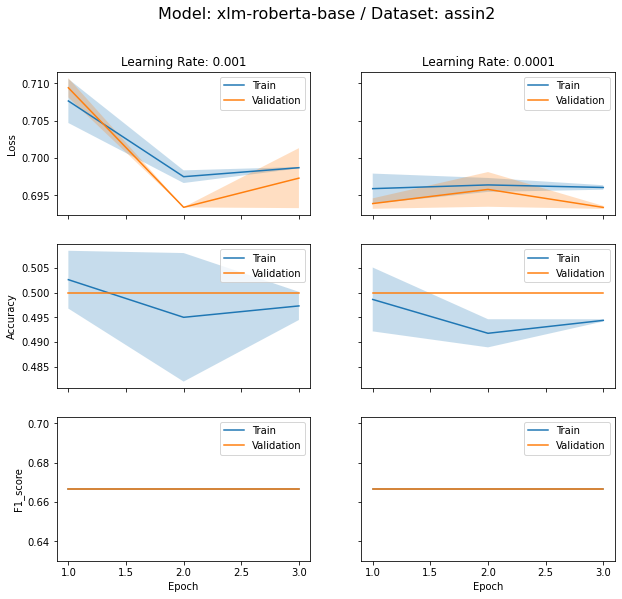

In [18]:
# load dataset
data = load_experiment_dataset(DATASET_ID)
_num_classes = data['train'].features['label'].num_classes
_num_outputs = _num_classes if _num_classes > 2 else 1


for model_id in MODEL_IDS:
    print(f"Searching hyperparameters for: {model_id}")

    # load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # dataset tokenization
    tokenized_data = tokenize_dataset(
        dataset=data,
        batch_size=1024,                                                             # <<<< BATCH SIZE
        tokenizer=tokenizer,
        text_pairs=DATASET_TEXT_PAIR,
    )

    # data preparation
    train_dataset, dev_dataset = to_tf_dataset(
        tokenized_data,
        tokenizer,
        batch_size=DATASET_BATCH_SIZE,
        train_split=DATASET_TRAIN_SPLIT,
        dev_split=DATASET_VALIDATION_SPLIT
    )

    # model training
    _logs = hyperparameter_search(
        build_classification_model,
        train_dataset,
        dev_dataset,
        epochs=EPOCHS,
        lr_parameters=LR_VALUES,
        executions_per_trial=EXECS_PER_TRIAL,

        # model builder parameters:
        model_id=model_id,
        num_outputs=_num_outputs,
        extra_metrics=[
            SparseF1Score(
                num_classes=_num_classes,
                average='weighted',
                name='f1_score'),
        ],
    )

    savefig_path = os.path.join(OUTPUT_DIR, DATASET_ID)
    if not os.path.exists(savefig_path):
        os.makedirs(savefig_path)

    save_metrics_log(
        _logs,
        savefig=os.path.join(savefig_path, model_id),
        title=f'Model: {model_id} / Dataset: {DATASET_ID}'
    )